<a href="https://colab.research.google.com/github/FaithOsamaye/Spaceship-Titanic/blob/main/SpaceShip_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test (1).csv')

In [ ]:
df = pd.concat([train_data,test_data],ignore_index=True)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.shape

(12970, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


**Note:**

We merged the train and test data hence why the Transported column is that low.

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# **Handling missing values**

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
homes =df['HomePlanet'].mode().iloc[0]
df['HomePlanet'].fillna(homes, inplace=True)

In [ ]:
sleep = df['CryoSleep'].mode().iloc[0]
df['CryoSleep'].fillna(sleep, inplace=True)

In [ ]:
df['Cabin'].ffill(inplace=True)

In [ ]:
dest = df['Destination'].mode().iloc[0]
df['Destination'].fillna(dest, inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df['VIP'].fillna(df['VIP'].mode().iloc[0], inplace=True)


In [ ]:
df['RoomService'].ffill(inplace=True)

In [ ]:
df['FoodCourt'].ffill(inplace=True)

In [ ]:
df['ShoppingMall'].ffill(inplace=True)

In [ ]:
df['Spa'].ffill(inplace=True)

In [ ]:
df['VRDeck'].ffill(inplace=True)

In [ ]:
df.isna().any()

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported      True
dtype: bool

# **Duplicates**

In [ ]:
df.duplicated().sum()

0

# **EDA**

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-v0_8-dark')

**1. How many passengers were on the spaceship accoridng to their age groups?**

Text(0.5, 1.0, 'Percent of Spaceship Citizens')

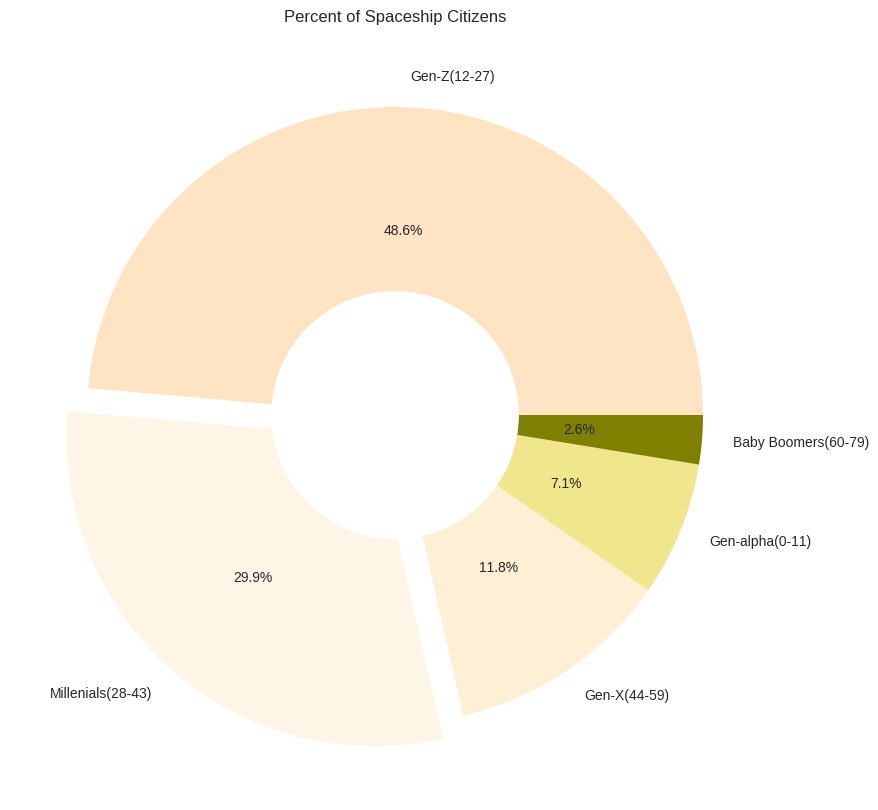

In [ ]:
bins = [0,12,28,44,60,79]

labels = ['Gen-alpha(0-11)','Gen-Z(12-27)','Millenials(28-43)','Gen-X(44-59)','Baby Boomers(60-79)']

df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels)

aged = df['Age_range'].value_counts()
plt.figure(figsize=(16,10))
explode =[0.0,0.1,0.0,0.0,0.0]
col = ['bisque','oldlace','papayawhip','khaki','olive']
plt.pie(aged.values, labels=aged.index,explode=explode, autopct='%1.1f%%',colors=col)
my_circle= plt.Circle((0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percent of Spaceship Citizens')

**2. Where were most of our clients from? And where were they headed to?**

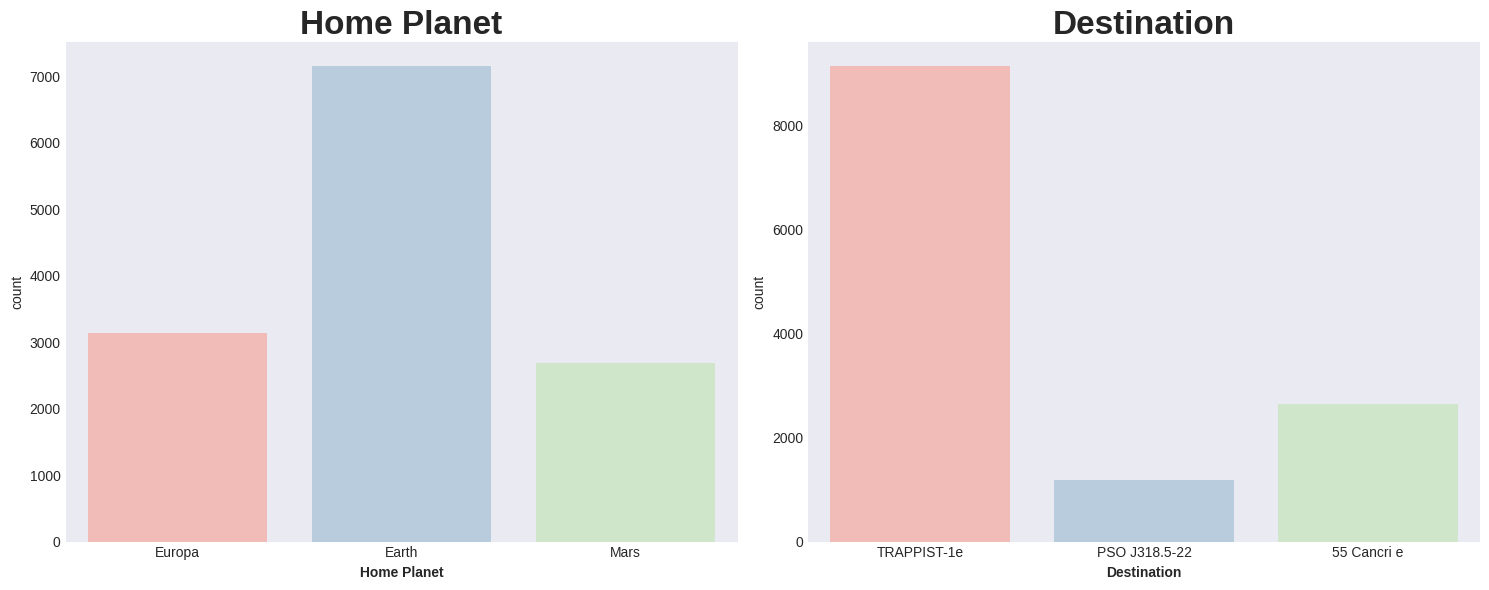

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='HomePlanet', hue='HomePlanet', data=df, palette='Pastel1', ax=axes[0])
sns.countplot(x='Destination', hue='Destination',data=df, palette='Pastel1', ax=axes[1])
axes[0].set_title('Home Planet', weight='bold', fontsize=24)
axes[0].set_xlabel('Home Planet', weight='bold')
axes[1].set_title('Destination', weight='bold', fontsize=24)
axes[1].set_xlabel('Destination', weight='bold')
plt.tight_layout()

**3. How many people were in the port and starboard cabin?**

In [ ]:
df['Cabin_new'] = df['Cabin'].str.split('/')

#Extract the cabin column
def extract_substring(value):
    return value[2]

df['Cabins'] = df['Cabin_new'].apply(extract_substring)

#Map the extracted values
df['Cabins'] = df['Cabins'].map({'P':'Port Cabin', 'S':'Starboard Cabin'})

In [ ]:
cabin_count= df['Cabins'].value_counts()
fig = px.pie(values=cabin_count.values, names=cabin_count.index, color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

**4. How many in home planet, cryosleep and vip were transported?**

Text(0.5, 1.0, 'Cryosleep Transported')

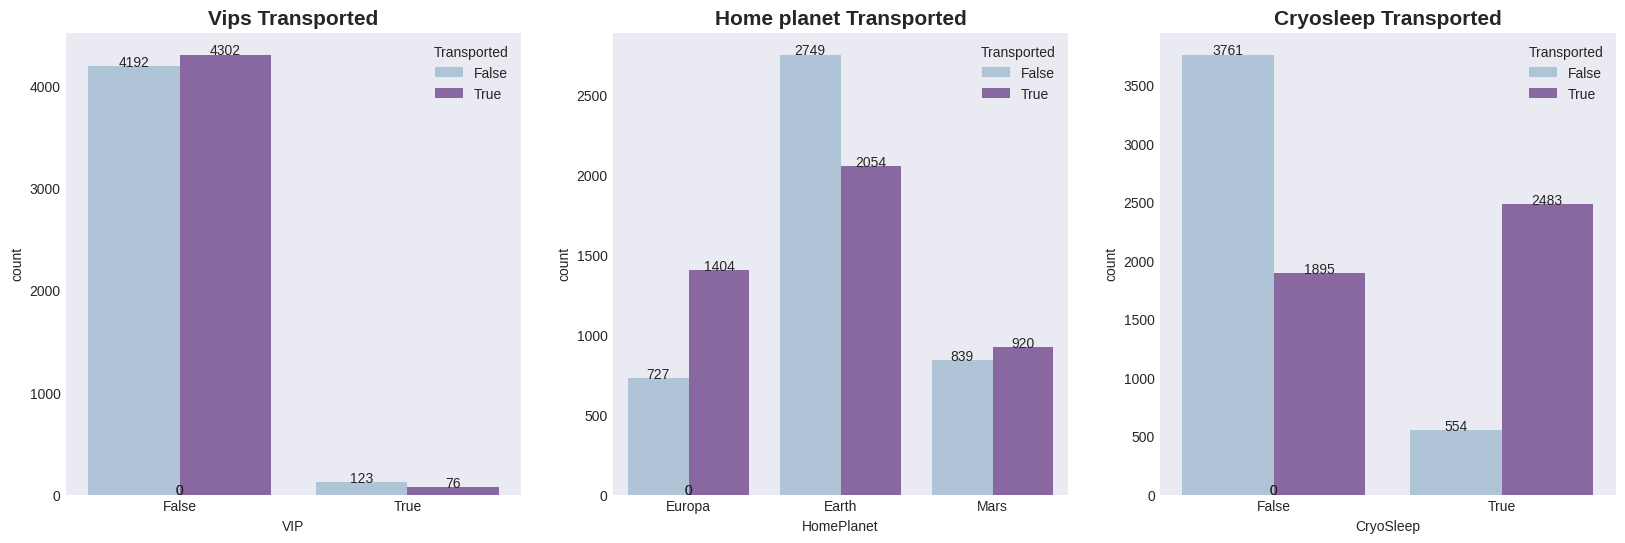

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,6))

col = ['chocolate','seashell']
ax0= sns.countplot(x='VIP', hue='Transported',data=df,  ax=axes[0],palette='BuPu', width=0.8)
for p in ax0.patches:
  height =p.get_height()
  ax0.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[0].set_title('Vips Transported', weight='bold',fontsize=15)
ax1= sns.countplot(x='HomePlanet', hue='Transported',data=df,  ax=axes[1],palette='BuPu',width=0.8)
for p in ax1.patches:
  height =p.get_height()
  ax1.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1].set_title('Home planet Transported', weight='bold',fontsize=15)
ax2= sns.countplot(x='CryoSleep', hue='Transported',data=df,  ax=axes[2],palette='BuPu',width=0.8)
for p in ax2.patches:
  height =p.get_height()
  ax2.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[2].set_title('Cryosleep Transported', weight='bold',fontsize=15)

**5. What passenger spent the most money in the services rendered in the spaceship?**

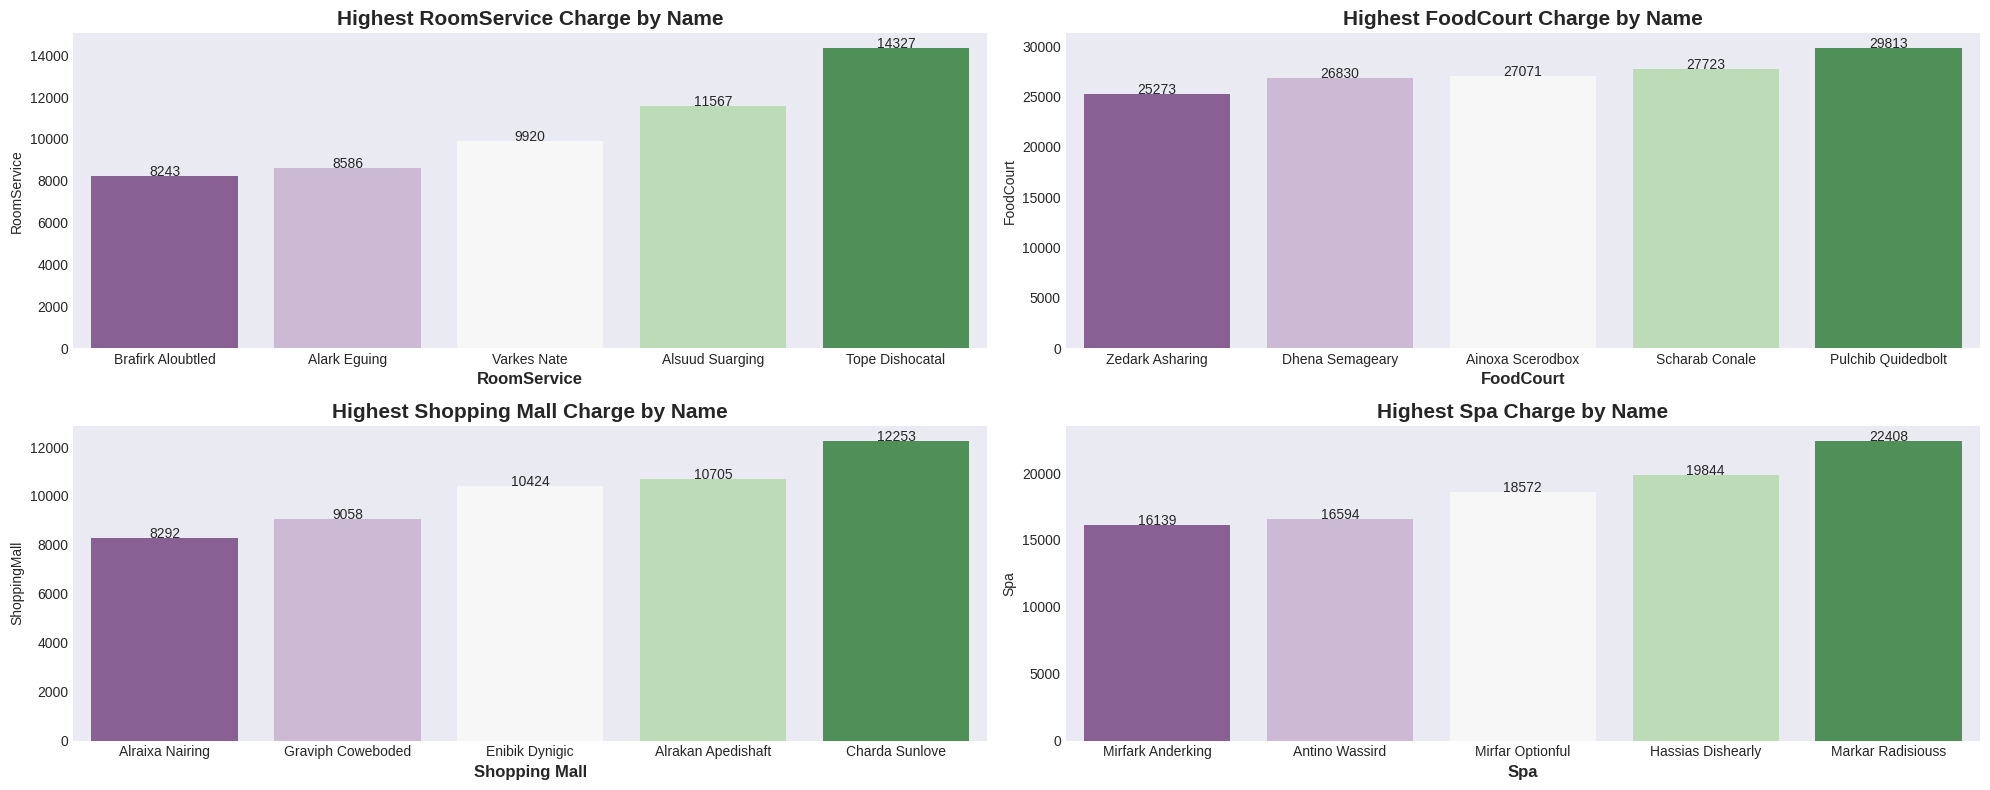

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(20,8))
room = pd.DataFrame(df.groupby('Name')['RoomService'].max().nlargest(n=5))
room = room.sort_values('RoomService',ascending=True)
ax0 = sns.barplot(x='Name', y='RoomService', data=room, ax=axes[0,0],hue='Name', palette='PRGn')
for p in ax0.patches:
  height =p.get_height()
  ax0.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[0,0].set_title('Highest RoomService Charge by Name', weight='bold',fontsize=15)
axes[0,0].set_xlabel('RoomService',weight='bold',fontsize=12)

court= pd.DataFrame(df.groupby('Name')['FoodCourt'].max().nlargest(n=5))
court = court.sort_values('FoodCourt',ascending=True)
ax1=sns.barplot(x='Name', y='FoodCourt', data=court,ax=axes[0,1],hue='Name', palette='PRGn')
for p in ax1.patches:
  height =p.get_height()
  ax1.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[0,1].set_title('Highest FoodCourt Charge by Name', weight='bold',fontsize=15)
axes[0,1].set_xlabel('FoodCourt',weight='bold',fontsize=12)

shop= pd.DataFrame(df.groupby('Name')['ShoppingMall'].max().nlargest(n=5))
shop = shop.sort_values('ShoppingMall',ascending=True)
ax2 =sns.barplot(x='Name', y='ShoppingMall', data=shop,ax=axes[1,0],hue='Name', palette='PRGn')
for p in ax2.patches:
  height =p.get_height()
  ax2.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1,0].set_title('Highest Shopping Mall Charge by Name', weight='bold',fontsize=15)
axes[1,0].set_xlabel('Shopping Mall',weight='bold',fontsize=12)

spa= pd.DataFrame(df.groupby('Name')['Spa'].max().nlargest(n=5))
spa = spa.sort_values('Spa',ascending=True)
ax3 = sns.barplot(x='Name', y='Spa', data=spa,ax=axes[1,1],hue='Name', palette='PRGn')
for p in ax3.patches:
  height =p.get_height()
  ax3.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1,1].set_title('Highest Spa Charge by Name', weight='bold',fontsize=15)
axes[1,1].set_xlabel('Spa',weight='bold',fontsize=12)
plt.tight_layout()
plt.show()

# **Machine Leaning**

**Handling Incorect data type**

In [ ]:
train_data =train_data.dropna()

In [ ]:
train_data['Cabin_new'] = train_data['Cabin'].str.replace('/','')

#Extract the cabin column
def extrac_substring(value):
    return value[2]

train_data['Cabin_new'] = train_data['Cabin_new'].astype(str)
train_data['Cabins'] = train_data['Cabin_new'].apply(extrac_substring)

#Map the extracted values
train_data['Cabins'] = train_data['Cabins'].map({'P':'Port Cabin', 'S':'Starboard Cabin'})

**Feature Engineering**

In [ ]:
home = pd.get_dummies(train_data['HomePlanet'],drop_first=True)
cryo = pd.get_dummies(train_data['CryoSleep'],drop_first=True)
dest = pd.get_dummies(train_data['Destination'],drop_first=True)
vips = pd.get_dummies(train_data['VIP'],drop_first=True)
cabs = pd.get_dummies(train_data['Cabins'],drop_first=True)

In [ ]:
train_data = pd.concat([train_data,home,cryo,dest,vips,cabs], axis=1)

In [ ]:
train_data= train_data.drop(['PassengerId','Name','HomePlanet','CryoSleep','Destination','VIP','Cabins','Cabin_new','Cabin'], axis=1)

In [ ]:
train_data['Transported'] = train_data['Transported'].map({True:1,False:0})

In [ ]:
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,True,PSO J318.5-22,TRAPPIST-1e,True,Starboard Cabin
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,0,1


**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
X = train_data.drop('Transported', axis=1)
y= train_data['Transported']

In [ ]:
#Convert the featurename to string
X.columns = X.columns.astype(str)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
log_model = LogisticRegression()

log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred =log_model.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.7976791120080726

In [ ]:
model_params = {'logistic_regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params':{'C':[1,5,10] }}}

In [ ]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,y)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,logistic_regression,0.788678,{'C': 5}


In [ ]:
log_model = LogisticRegression(C=5)

log_model.fit(X_train,y_train)

LogisticRegression(C=5)

In [ ]:
y_pred =log_model.predict(X_test)

In [ ]:
scored = accuracy_score(y_pred,y_test)
print(f'The accuracy score is: {scored}')

The accuracy score is: 0.7956609485368314


In [ ]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[775 176]
 [229 802]]


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       951
           1       0.82      0.78      0.80      1031

    accuracy                           0.80      1982
   macro avg       0.80      0.80      0.80      1982
weighted avg       0.80      0.80      0.80      1982



**2. K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,knn_pred)

0.7679112008072654

In [ ]:
# Sourcing for the best k value
error_rate=[]

for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K Value')

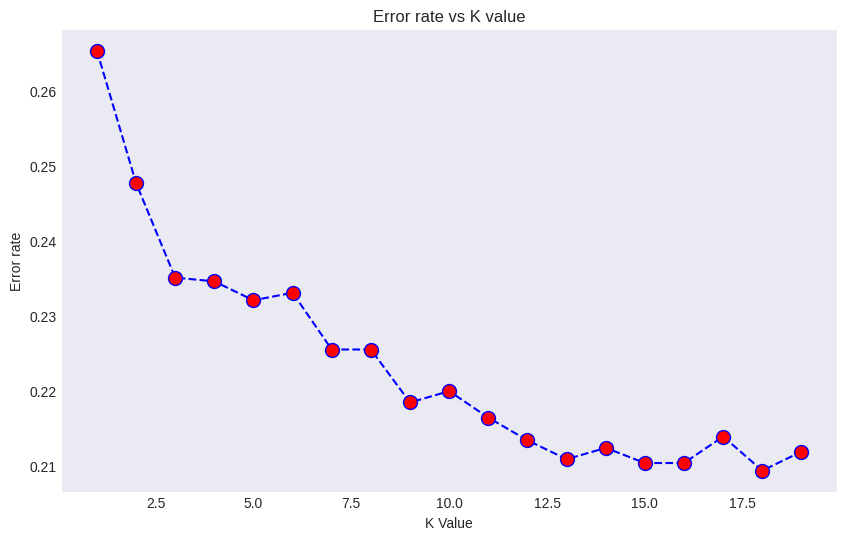

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.ylabel('Error rate')
plt.xlabel('K Value')

In [ ]:
#Trying out the k value of our choice
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
knn_new_pred = knn.predict(X_test)

In [ ]:
accuracy_score(knn_new_pred,y_test)

0.7880928355196771

In [ ]:
confusion_matrix(knn_new_pred, y_test)


array([[732, 148],
       [272, 830]])

In [ ]:
print(classification_report(knn_new_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       880
           1       0.85      0.75      0.80      1102

    accuracy                           0.79      1982
   macro avg       0.79      0.79      0.79      1982
weighted avg       0.80      0.79      0.79      1982



**3. SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

svm_model.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(svm_pred,y_test)

0.7906155398587286

**4.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
accuracy_score(dtree_pred, y_test)

0.7426841574167508

In [ ]:
confusion_matrix(dtree_pred, y_test)

array([[721, 227],
       [283, 751]])

In [ ]:
print(classification_report(dtree_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       948
           1       0.77      0.73      0.75      1034

    accuracy                           0.74      1982
   macro avg       0.74      0.74      0.74      1982
weighted avg       0.74      0.74      0.74      1982



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,rfc_pred)

0.7936427850655903

In [ ]:
confusion_matrix(rfc_pred, y_test)

array([[801, 206],
       [203, 772]])

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1004
           1       0.79      0.79      0.79       978

    accuracy                           0.79      1982
   macro avg       0.79      0.79      0.79      1982
weighted avg       0.79      0.79      0.79      1982



**Random forest prediction on the test data**

In [ ]:
test_data = test_data.iloc[:len(rfc_pred)].copy()
test_data['Transported'] = rfc_pred

In [ ]:
test_data['Transported'] = test_data['Transported'].map({0: False,1:True})

In [ ]:
test_data = test_data[['PassengerId', 'Transported']]
test_data.head(20)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
5,0027_01,True
6,0029_01,False
7,0032_01,True
8,0032_02,False
9,0033_01,True


**Logistic regression prediction on the test data**

In [ ]:
test_data = test_data.iloc[:len(y_pred)].copy()
test_data['Transported'] = y_pred

In [ ]:
test_data['Transported'] = test_data['Transported'].map({0: False, 1:True})

In [ ]:
test_data = test_data[['PassengerId', 'Transported']]
test_data.head(20)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,True
5,0027_01,True
6,0029_01,False
7,0032_01,True
8,0032_02,False
9,0033_01,True
